In [1]:
!pip install kaggle


In [31]:
!pip install textblob
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [5]:
df.tail()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE
579,20,9,170,The overall quality of the teaching-learning p...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE


In [6]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [7]:
df.describe()

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000


In [9]:
df.nunique()

,0
SN,20
Total Feedback Given,18
Total Configured,24
Questions,20
Weightage 1,11
Weightage 2,9
Weightage 3,19
Weightage 4,36
Weightage 5,35
Average/ Percentage,152


In [10]:
df.shape

(580, 12)

In [11]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [13]:
df[["Avg_Score", "Percentage"]] = df['Average/ Percentage'].str.split("/", expand=True)

df["Avg_Score"] = df["Avg_Score"].astype(float)
df["Percentage"] = df["Percentage"].astype(float)

In [14]:
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Avg_Score,Percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.0,80.0


In [15]:
df.dtypes

,0
SN,int64
Total Feedback Given,int64
Total Configured,int64
Questions,object
Weightage 1,int64
Weightage 2,int64
Weightage 3,int64
Weightage 4,int64
Weightage 5,int64
Average/ Percentage,object


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#1️⃣ Import Libraries
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [17]:
# Basic stats
df.describe()


,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Avg_Score,Percentage
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138,3.842793,76.855690
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931,0.629038,12.578606
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.330000,26.670000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.500000,70.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.920000,78.330000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000,4.250000,85.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000,5.000000,100.000000


In [20]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course',
       'Avg_Score', 'Percentage'],
      dtype='object')

In [21]:
#2️⃣ Quick Overview
# Check unique courses
df['Course Name '].value_counts()
df["Basic Course"].value_counts()


,count
Basic Course,
BACHELOR OF SCIENCE,60
BACHELOR OF MANAGEMENT STUDIES,60
BACHELOR OF ARTS,40
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE),40
MA PSYCHOLOGY,40
MSC COMPUTER SCIENCE,40
MSC DATA SCIENCE,40
MSC ANALYTICAL CHEMISTRY,40
BACHELOR OF COMMERCE,40


In [30]:
#3️⃣ Participation Rate
df["Participation_Rate (%)"] = (df["Total Feedback Given"] / df["Total Configured"]) * 100

# Top 10 questions by participation
df.sort_values("Participation_Rate (%)", ascending=False)[["Questions", "Participation_Rate (%)"]].head(10)


,Questions,Participation_Rate (%)
379,The overall quality of the teaching-learning p...,77.272727
378,What percentage of teachers use ICT tools such...,77.272727
377,Efforts are made by the institute/ teachers to...,77.272727
376,Teachers encourage you to participate in extra...,77.272727
371,The teachers illustrate the concepts through e...,77.272727
370,Your mentor does a necessary follow-up with an...,77.272727
369,Teachers inform you about your expected compet...,77.272727
368,The institution provides multiple opportunitie...,77.272727
375,The institute/ teachers use student-centric me...,77.272727
374,The institution makes effort to engage student...,77.272727


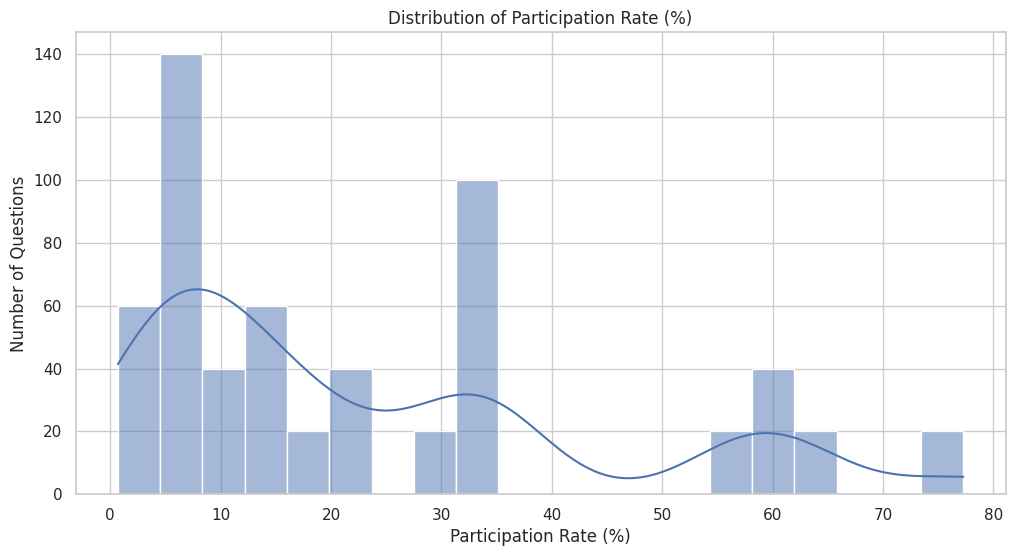

In [23]:
sns.histplot(df["Participation_Rate (%)"], bins=20, kde=True)
plt.title("Distribution of Participation Rate (%)")
plt.xlabel("Participation Rate (%)")
plt.ylabel("Number of Questions")
plt.show()


In [24]:
#4️⃣ Average Score Analysis

# Top 10 questions by average score
df.sort_values("Avg_Score", ascending=False)[["Questions", "Avg_Score"]].head(10)


,Questions,Avg_Score
11,The teachers illustrate the concepts through e...,5.0
20,How much of the syllabus was covered in the cl...,5.0
1,How well did the teachers prepare for the clas...,5.0
229,Teachers inform you about your expected compet...,5.0
231,The teachers illustrate the concepts through e...,5.0
21,How well did the teachers prepare for the clas...,5.0
22,How well were the teachers able to communicate?,5.0
24,Fairness of the internal evaluation process by...,5.0
23,The teachers approach to teaching can best be...,5.0
27,The teaching and mentoring process in your ins...,5.0


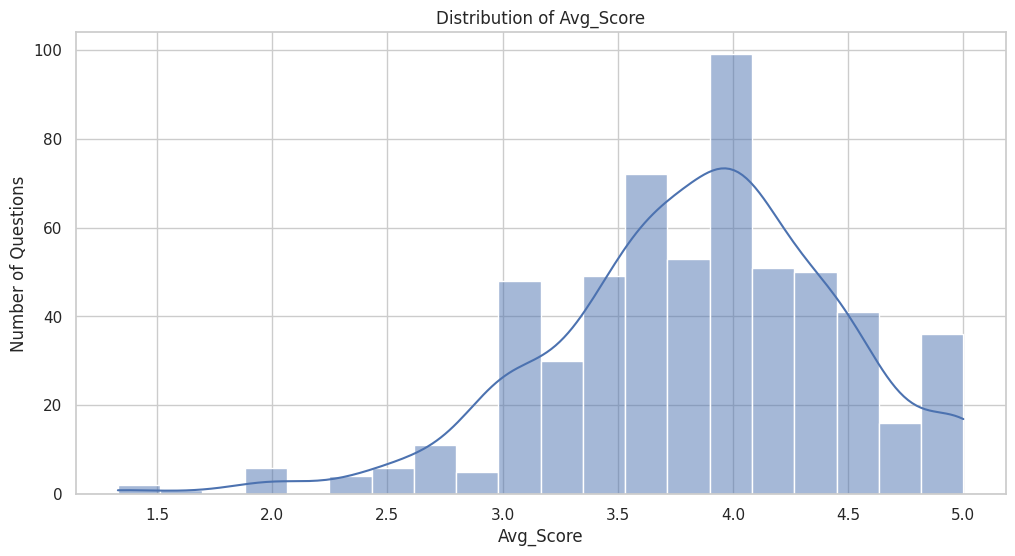

In [25]:
sns.histplot(df["Avg_Score"], bins=20, kde=True)
plt.title("Distribution of Avg_Score")
plt.xlabel("Avg_Score")
plt.ylabel("Number of Questions")
plt.show()


/tmp/ipython-input-700681187.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Satisfaction_Level", data=df, palette="viridis")


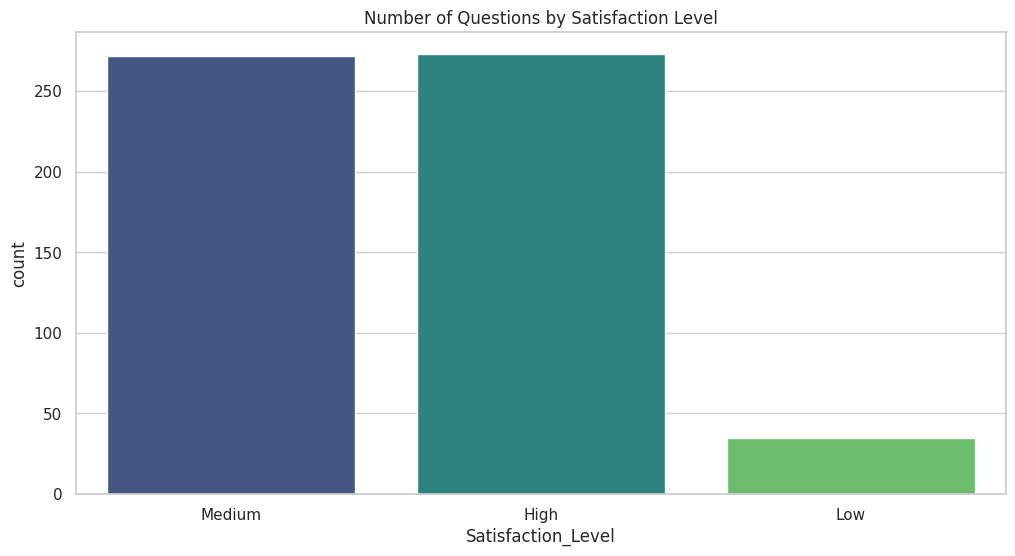

In [26]:
#5️⃣ Satisfaction Levels

def satisfaction_level(score):
    if score >= 4:
        return "High"
    elif score >= 3:
        return "Medium"
    else:
        return "Low"

df["Satisfaction_Level"] = df["Avg_Score"].apply(satisfaction_level)

# Count plot
sns.countplot(x="Satisfaction_Level", data=df, palette="viridis")
plt.title("Number of Questions by Satisfaction Level")
plt.show()


/tmp/ipython-input-3160700557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_avg.values, y=course_avg.index, palette="magma")


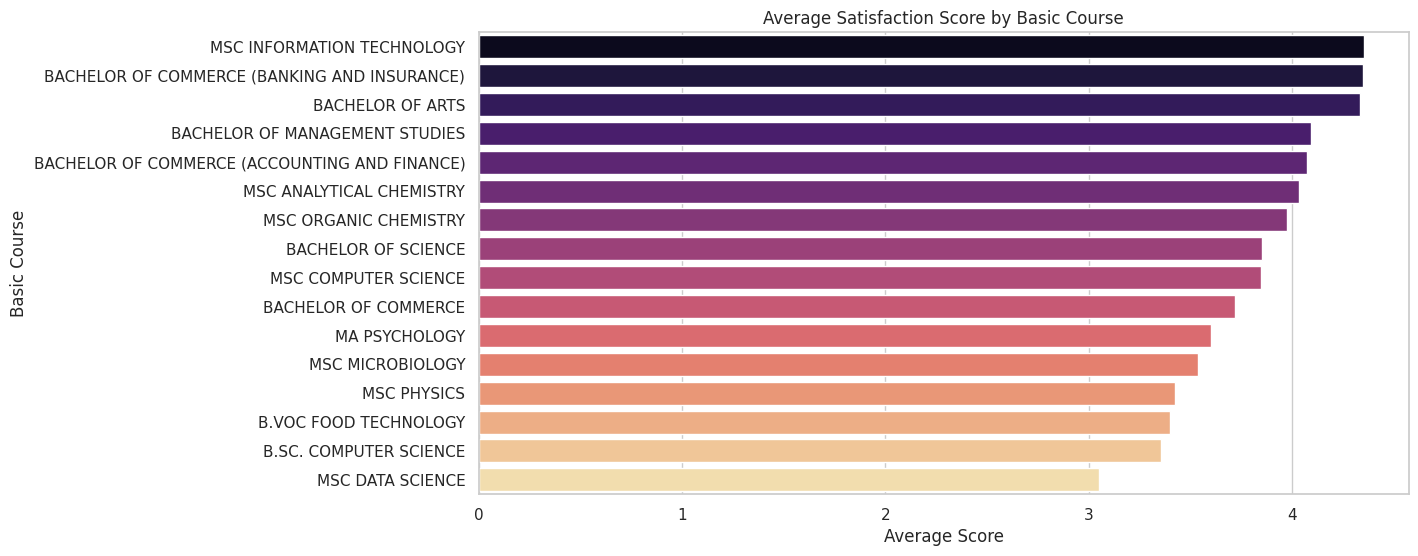

In [27]:
#6️⃣ Category / Course Comparison


# Average score by Basic Course
course_avg = df.groupby("Basic Course")["Avg_Score"].mean().sort_values(ascending=False)

sns.barplot(x=course_avg.values, y=course_avg.index, palette="magma")
plt.xlabel("Average Score")
plt.ylabel("Basic Course")
plt.title("Average Satisfaction Score by Basic Course")
plt.show()


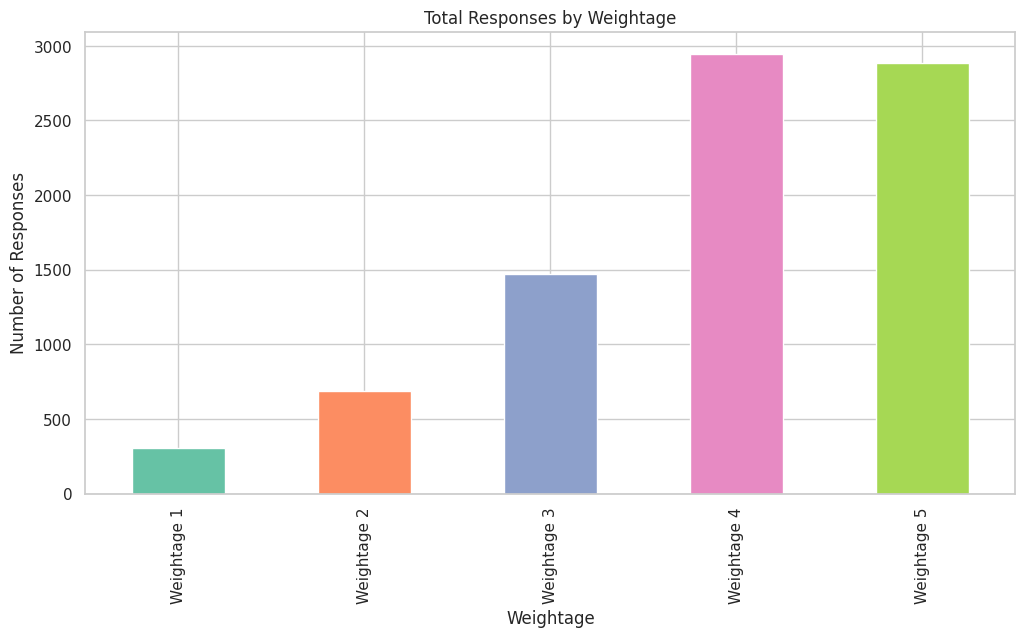

In [28]:
#7️⃣ Weightage Distribution (1–5)


weightage_cols = ["Weightage 1", "Weightage 2", "Weightage 3", "Weightage 4", "Weightage 5"]
df[weightage_cols].sum().plot(kind="bar", color=sns.color_palette("Set2"))
plt.title("Total Responses by Weightage")
plt.ylabel("Number of Responses")
plt.xlabel("Weightage")
plt.show()


In [29]:
#8️⃣ Identify Low-Scoring Questions (Improvement Areas)

low_satisfaction = df[df["Satisfaction_Level"] == "Low"]
low_satisfaction[["Questions", "Avg_Score", "Participation_Rate (%)"]]


,Questions,Avg_Score,Participation_Rate (%)
7,The teaching and mentoring process in your ins...,2.00,8.333333
12,The teachers identify your strengths and encou...,2.00,8.333333
17,Efforts are made by the institute/ teachers to...,2.00,8.333333
58,What percentage of teachers use ICT tools such...,2.82,62.184874
118,What percentage of teachers use ICT tools such...,2.33,6.857143
152,The teachers identify your strengths and encou...,2.86,35.000000
153,Teachers are able to identify your weaknesses ...,2.43,35.000000
158,What percentage of teachers use ICT tools such...,2.57,35.000000
166,The institute takes an active interest in prom...,2.50,16.666667
167,The teaching and mentoring process in your ins...,2.75,16.666667


Sentiment Analysis

In [33]:
import random

def generate_feedback(avg):
    if avg >= 4:
        return random.choice([
            "Great event!", "Loved it!", "Very informative", "Excellent experience"
        ])
    elif avg >= 3:
        return random.choice([
            "It was okay", "Could be better", "Average event"
        ])
    else:
        return random.choice([
            "Not satisfied", "Poor organization", "Did not enjoy"
        ])

df['Feedback'] = df['Avg_Score'].apply(generate_feedback)
df[['Questions','Avg_Score','Feedback']].head()


,Questions,Avg_Score,Feedback
0,How much of the syllabus was covered in the cl...,3.0,Average event
1,How well did the teachers prepare for the clas...,5.0,Excellent experience
2,How well were the teachers able to communicate?,5.0,Very informative
3,The teachers approach to teaching can best be...,3.0,Average event
4,Fairness of the internal evaluation process by...,4.0,Loved it!


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Feedback'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(label_sentiment)
df[['Feedback','sentiment_score','Sentiment']].head()


,Feedback,sentiment_score,Sentiment
0,Average event,0.0000,Neutral
1,Excellent experience,0.5719,Positive
2,Very informative,0.0000,Neutral
3,Average event,0.0000,Neutral
4,Loved it!,0.6360,Positive


In [36]:
import pandas as pd
import random

# Strip column names to avoid KeyErrors
df.columns = df.columns.str.strip()

# Create simulated Feedback column based on Avg_Score
def generate_feedback(avg):
    if avg >= 4:
        return random.choice([
            "Great event!", "Loved it!", "Very informative", "Excellent experience"
        ])
    elif avg >= 3:
        return random.choice([
            "It was okay", "Could be better", "Average event"
        ])
    else:
        return random.choice([
            "Not satisfied", "Poor organization", "Did not enjoy"
        ])

df['Feedback'] = df['Avg_Score'].apply(generate_feedback)


In [37]:
df["Participation_Rate (%)"] = (df["Total Feedback Given"] / df["Total Configured"]) * 100


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment score
df['sentiment_score'] = df['Feedback'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Label sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(label_sentiment)


In [39]:
def satisfaction_level(score):
    if score >= 4:
        return "High"
    elif score >= 3:
        return "Medium"
    else:
        return "Low"

df["Satisfaction_Level"] = df["Avg_Score"].apply(satisfaction_level)


/tmp/ipython-input-4225526799.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Satisfaction_Level", data=df, palette="viridis")


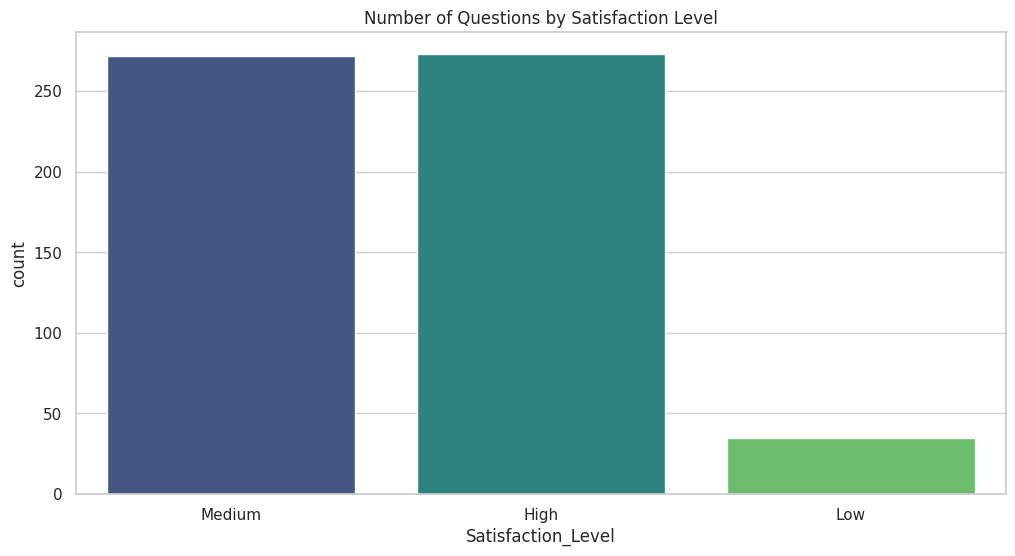

In [40]:

sns.countplot(x="Satisfaction_Level", data=df, palette="viridis")
plt.title("Number of Questions by Satisfaction Level")
plt.show()


/tmp/ipython-input-1989042422.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="coolwarm")


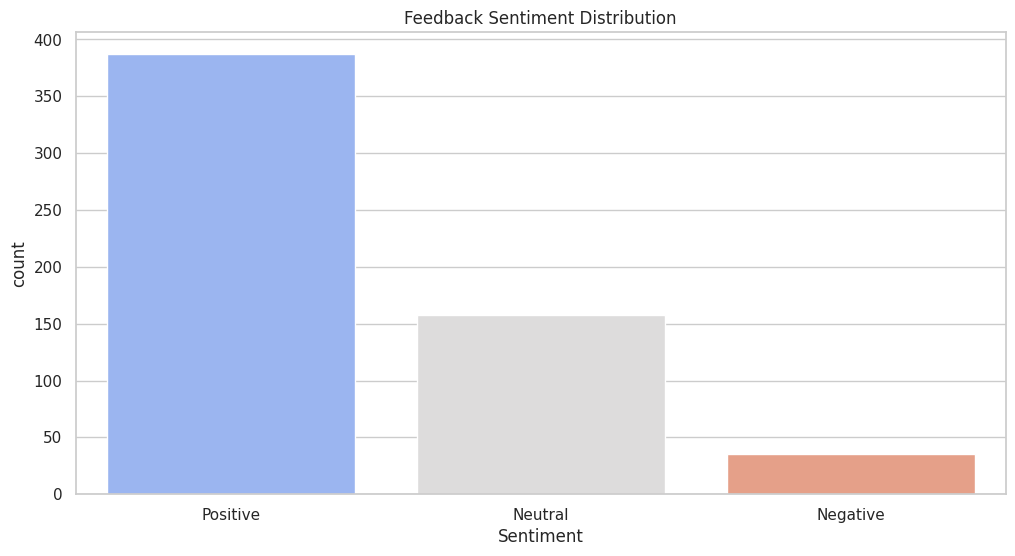

In [41]:
sns.countplot(x="Sentiment", data=df, palette="coolwarm")
plt.title("Feedback Sentiment Distribution")
plt.show()


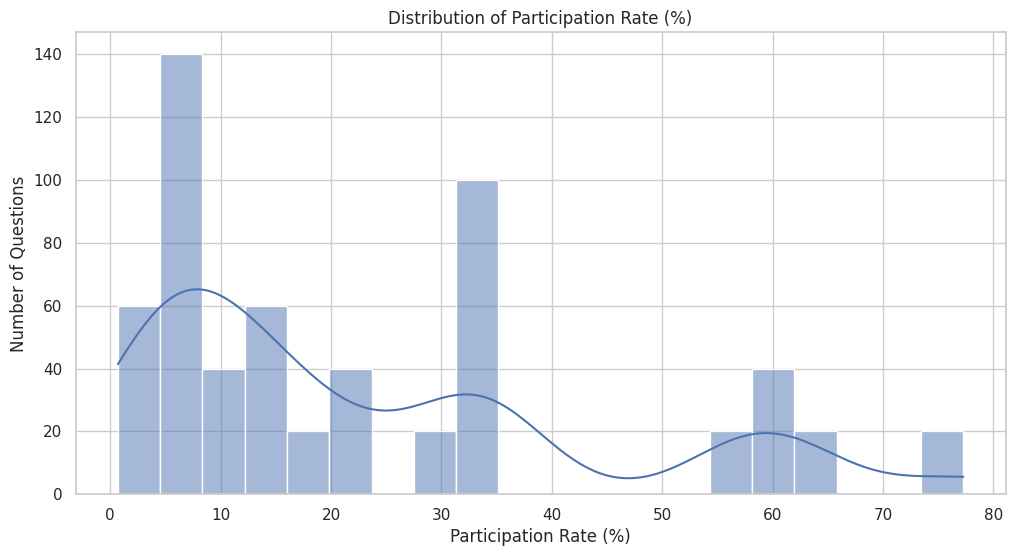

In [42]:
sns.histplot(df["Participation_Rate (%)"], bins=20, kde=True)
plt.title("Distribution of Participation Rate (%)")
plt.xlabel("Participation Rate (%)")
plt.ylabel("Number of Questions")
plt.show()


In [43]:
#✅ Top Low-Scoring Questions


low_satisfaction = df[df["Satisfaction_Level"] == "Low"]
low_satisfaction[["Questions","Avg_Score","Feedback","Sentiment","Participation_Rate (%)"]]


,Questions,Avg_Score,Feedback,Sentiment,Participation_Rate (%)
7,The teaching and mentoring process in your ins...,2.00,Not satisfied,Negative,8.333333
12,The teachers identify your strengths and encou...,2.00,Not satisfied,Negative,8.333333
17,Efforts are made by the institute/ teachers to...,2.00,Not satisfied,Negative,8.333333
58,What percentage of teachers use ICT tools such...,2.82,Did not enjoy,Negative,62.184874
118,What percentage of teachers use ICT tools such...,2.33,Not satisfied,Negative,6.857143
152,The teachers identify your strengths and encou...,2.86,Did not enjoy,Negative,35.000000
153,Teachers are able to identify your weaknesses ...,2.43,Not satisfied,Negative,35.000000
158,What percentage of teachers use ICT tools such...,2.57,Not satisfied,Negative,35.000000
166,The institute takes an active interest in prom...,2.50,Did not enjoy,Negative,16.666667
167,The teaching and mentoring process in your ins...,2.75,Did not enjoy,Negative,16.666667


In [44]:
#6️⃣ Word Frequency / Themes

from collections import Counter
import re

# Combine all feedback
all_feedback = " ".join(df['Feedback'].dropna().astype(str))
all_feedback = re.sub(r'\W+', ' ', all_feedback.lower())
word_counts = Counter(all_feedback.split())
word_counts.most_common(20)


[('it', 166),
 ('event', 148),
 ('could', 99),
 ('be', 99),
 ('better', 99),
 ('average', 87),
 ('was', 86),
 ('okay', 86),
 ('loved', 80),
 ('very', 71),
 ('informative', 71),
 ('excellent', 61),
 ('experience', 61),
 ('great', 61),
 ('not', 27),
 ('did', 14),
 ('enjoy', 14),
 ('satisfied', 13),
 ('poor', 8),
 ('organization', 8)]